<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

from IPython.display import display, Markdown

In [2]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]
num_cols = ['year'] + score_cols
cat_cols = ['ISO_code', 'countries', 'region']
important_cols = cat_cols + num_cols
important_cols

['ISO_code',
 'countries',
 'region',
 'year',
 'pf_identity_legal',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_sex',
 'pf_identity_divorce',
 'pf_identity',
 'pf_score',
 'pf_rank',
 'ef_score',
 'ef_rank',
 'hf_score',
 'hf_rank']

In [6]:
dataset[important_cols]

,ISO_code,countries,region,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,ALB,Albania,Eastern Europe,2017,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,DZA,Algeria,Middle East & North Africa,2017,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,AGO,Angola,Sub-Saharan Africa,2017,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,ARG,Argentina,Latin America & the Caribbean,2017,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,ARM,Armenia,Caucasus & Central Asia,2017,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,AUS,Australia,Oceania,2008,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,DNK,Denmark,Western Europe,2008,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,CHE,Switzerland,Western Europe,2008,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,NZL,New Zealand,Oceania,2008,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,ISO_code,countries,region,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,ALB,Albania,Eastern Europe,2017,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,DZA,Algeria,Middle East & North Africa,2017,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,AGO,Angola,Sub-Saharan Africa,2017,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,ARG,Argentina,Latin America & the Caribbean,2017,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,ARM,Armenia,Caucasus & Central Asia,2017,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,AUS,Australia,Oceania,2008,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,DNK,Denmark,Western Europe,2008,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,CHE,Switzerland,Western Europe,2008,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,NZL,New Zealand,Oceania,2008,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## Respuestas

In [9]:
def summarize_iterable(values, max_len=10):
    if len(values) > max_len:
        summary_format = '{}, ...'
        summary_values = values[:max_len]
    else:
        summary_format = '{}'
        summary_values = values
    summary_reprs = (repr(value) for value in summary_values)
    return summary_format.format(', '.join(summary_reprs))

### Ejercicio 1

Los rangos de las variables **numéricas** son:

In [10]:
num_ranges_df = dataset.describe().loc[['min', 'max']]
num_ranges_df

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
min,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,2.22,1.0,2.58,1.0,3.69,1.0
max,2017.0,10.0,10.0,10.0,10.0,10.0,10.0,9.56,162.0,9.11,162.0,9.12,162.0


Los rangos de las variables **categóricas** son:

In [11]:
for cat_col_name in cat_cols:
    col_range = set(dataset[cat_col_name])
    display(Markdown('**{}**:'.format(cat_col_name)))
    display(Markdown(summarize_iterable(sorted(col_range))))

**ISO_code**:

'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', ...

**countries**:

'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', ...

**region**:

'Caucasus & Central Asia', 'East Asia', 'Eastern Europe', 'Latin America & the Caribbean', 'Middle East & North Africa', 'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa', 'Western Europe'

### Ejercicio 2

Veamos cómo fueron variando hf_score y pf_identity año tras año en Argentina y Brasil para darnos una mínima idea de la evolución de estos valores:

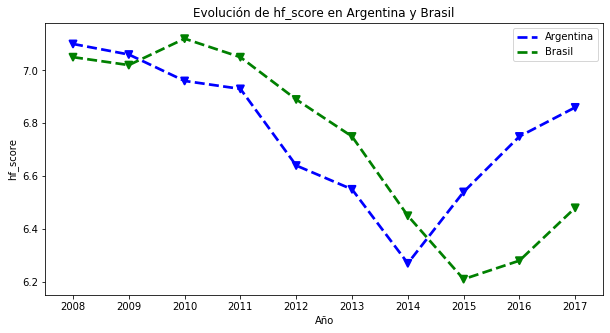

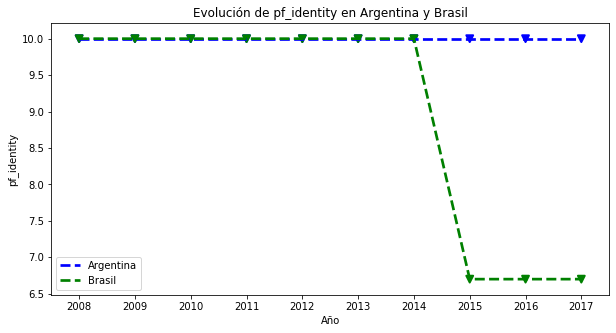

In [14]:
arg_data = dataset[dataset.ISO_code == 'ARG']
bra_data = dataset[dataset.ISO_code == 'BRA']

for col_name in ['hf_score', 'pf_identity']:
    plt.figure(figsize=(10, 5))
    seaborn.pointplot(data=arg_data,
                      x='year', y=col_name,
                      dodge=True, ci=None,
                      markers='v', linestyles='--', errwidth=1, capsize=0.2,
                      color='blue')
    seaborn.pointplot(data=bra_data,
                      x='year', y=col_name,
                      dodge=True, ci=None,
                      markers='v', linestyles='--', errwidth=1, capsize=0.2,
                      color='green')
    plt.xlabel('Año')
    plt.title('Evolución de {} en Argentina y Brasil'.format(col_name))
    plt.legend(labels=['Argentina', 'Brasil'])

Veamos las distribuciones de estas dos variables en el mundo; tal vez las formas nos digan algo:

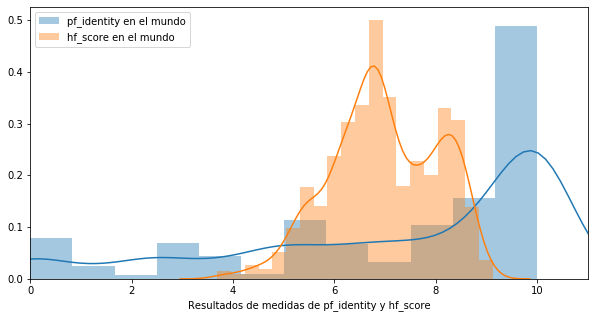

In [188]:
plt.figure(figsize=(10, 5))
seaborn.distplot(dataset.pf_identity, label='pf_identity en el mundo')
seaborn.distplot(dataset.hf_score, label='hf_score en el mundo')
plt.xlim(0, 11)
plt.xlabel('Resultados de medidas de pf_identity y hf_score')
plt.legend()

Con estos gráficos podemos concluir que:
* Si queremos los datos más actuales, podemos quedarnos con los valores del último año para cada país.
* Si queremos datos de varios años, en cuanto a hf_score podríamos usar la media, y en cuanto a pf_identity podríamos usar la mediana debido a que esta variable tiene una distribuición más asimétrica.

### Ejercicio 3

Primero, veamos mediana, media y desviación estándar de estas dos variables tanto para Latinoamérica y el Caribe como para todo el mundo:

In [177]:
# Info from Latin America & the Caribbean
lac_data = dataset[dataset.region == 'Latin America & the Caribbean'][['pf_identity', 'hf_score']]
lac_median = lac_data.median().add_suffix('_median')
lac_mean = lac_data.mean().add_suffix('_mean')
lac_std = lac_data.std().add_suffix('_std')
lac_info = pandas.concat([lac_median, lac_mean, lac_std], axis=0)

# World info
world_data = dataset[['pf_identity', 'hf_score']]
world_median = world_data.median().add_suffix('_median')
world_mean = world_data.mean().add_suffix('_mean')
world_std = world_data.std().add_suffix('_std')
world_info = pandas.concat([world_median, world_mean, world_std], axis=0)

# Compared info
compared_info = pandas.concat([lac_info, world_info], axis=1)
compared_info.columns = ['Latin America & the Caribbean', 'World']
compared_info

,Latin America & the Caribbean,World
pf_identity_median,10.000000,8.800000
hf_score_median,7.020000,6.900000
pf_identity_mean,8.582171,7.280649
hf_score_mean,7.036977,6.978214
pf_identity_std,1.875832,3.181577
hf_score_std,0.634897,1.056239


Ahora comparemos distribuciones:

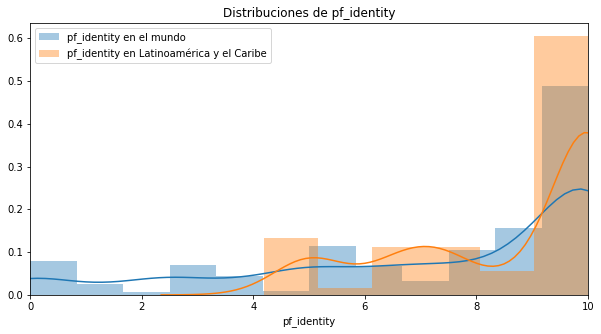

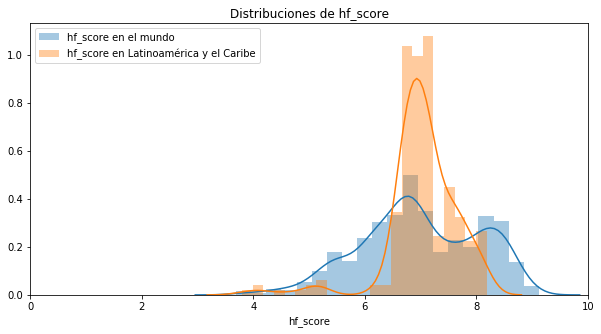

In [190]:
plt.figure(figsize=(10, 5))
seaborn.distplot(world_data.pf_identity, label='pf_identity en el mundo')
seaborn.distplot(lac_data.pf_identity, label='pf_identity en Latinoamérica y el Caribe')
plt.xlim(0, 10)
plt.title('Distribuciones de pf_identity')
plt.legend()

plt.figure(figsize=(10, 5))
seaborn.distplot(world_data.hf_score, label='hf_score en el mundo')
seaborn.distplot(lac_data.hf_score, label='hf_score en Latinoamérica y el Caribe')
plt.xlim(0, 10)
plt.title('Distribuciones de hf_score')
plt.legend()

Con estas observaciones concluimos que la comparación es válida siempre y cuando:
* Para la variable **pf_identity** (cuya distribución es bastante asimétrica) se use la **mediana**.
* Para la variable **hf_score** (cuya distribución es bastante simétrica, "más normal"), se use la **media**.

### Ejercicio 4

La moda no tiene sentido ya que contamos con las otras dos medidas resumen (media y mediana).

### Ejercicio 5 (TO-DO)

In [86]:
# pf_identity_legal tiene pocos datos, así que quizá pueda eliminarse.
# En algunas filas los valores son casi todos NaN, por lo tanto quizá puedan eliminarse.

(dataset.isna().sum() / len(dataset) * 100).reset_index()
dataset.loc[dataset.pf_identity_divorce.loc[dataset.pf_identity_divorce.isna()].keys()]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
138,2017,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,NaN,10.0,8.30,38.0,6.65,98.0,7.48,51.0
190,2016,CPV,Cape Verde,Sub-Saharan Africa,NaN,10.0,10.0,10.0,NaN,10.0,8.18,40.0,7.11,68.0,7.64,48.0
223,2016,GUY,Guyana,Latin America & the Caribbean,NaN,0.0,10.0,5.0,NaN,5.0,7.04,79.0,6.34,114.0,6.69,91.0
291,2016,SYC,Seychelles,Sub-Saharan Africa,NaN,10.0,10.0,10.0,NaN,10.0,7.90,51.0,7.17,65.0,7.54,52.0
336,2015,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2008,SUR,Suriname,Latin America & the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1476,2008,TJK,Tajikistan,Caucasus & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1477,2008,TLS,Timor-Leste,South Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicio 6 (TO-DO)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

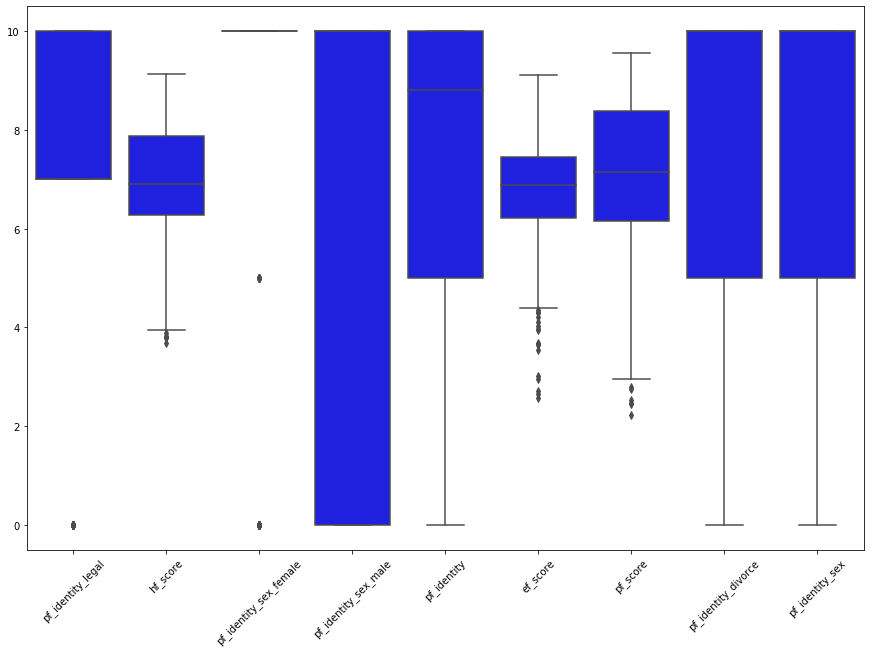

In [93]:
plt.figure(figsize=(15, 10))
data = dataset[set(score_cols) - {'pf_rank', 'ef_rank', 'hf_rank'}]
seaborn.boxplot(data=data, color='#0000FF')
plt.xticks(rotation=45)


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?